In [1]:
# usual packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# machine learning packages
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [4]:
#COSMOS = pd.read_csv('match_COSMOS_999.txt')
cosmos = pd.read_csv('match_COSMOS_99_with_err.csv')
cosmos=cosmos[cosmos.columns[1:64:2]]

FileNotFoundError: [Errno 2] File b'match_COSMOS_99_with_err.csv' does not exist: b'match_COSMOS_99_with_err.csv'

In [3]:
def dataprocess(df, zspec_drop=True, magnitude_drop=True):
    
    df_new=df.copy()
    print(df_new.shape)
    if (magnitude_drop==True):
        df_new=df_new[df_new["IA767_MAG_APER2"]<=22.5]
        
    if (zspec_drop == True):
        df_new=df_new[df_new['zspec']>0]
        
#     print(df_new.head(10))
    print(len(df_new))
    return df_new.iloc[:,:-1] , df_new.iloc[:,-1]

photo_bands,zspec=dataprocess(cosmos, zspec_drop=True, magnitude_drop=True)



NameError: name 'cosmos' is not defined

In [281]:
# print(photo_bands[:5])
# print(zspec[:5])

photo_bands_train,photo_bands_test, z_spec_train, z_spec_test = train_test_split(photo_bands, zspec, test_size=0.2)

In [282]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=2,random_state=42)
rf.fit(photo_bands_train,z_spec_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [283]:
pre=rf.predict(photo_bands_test)

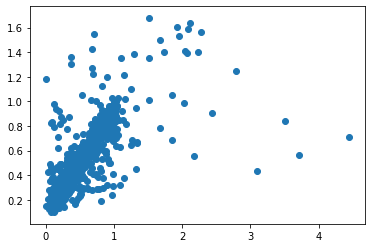

In [284]:
plt.scatter(z_spec_test,pre)
plt.savefig('random_forest_dropped_mag')

In [285]:
len_pre=len(pre)
left_inteval=int(0.16*len_pre)
right_inteval=int(-0.16*len_pre)
center_pre=np.sort(np.asarray(pre))[left_inteval:right_inteval]
print(len(center_pre))
sum=0
mean=np.asarray(center_pre).mean()
for xi in center_pre:
    sum+=(xi-mean)**2
    sum/=len(center_pre)
print('variance is:'+str(sum) )


1686
variance is:3.625857450537074e-05
